<a href="https://colab.research.google.com/github/kishore-lab/dem/blob/master/dem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
data=pd.read_csv('/content/data.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [0]:
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [0]:
data = data.drop(['id', 'Unnamed: 32'], axis = 1)
print(data.columns)

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


In [0]:
data.dtypes

diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
concave points_worst

In [0]:
df=data.values
y = df[:,0]
x = df[:,1:31]

from sklearn.preprocessing import LabelEncoder

# performing label encoding
le = LabelEncoder()
y= le.fit_transform(y)



In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 16)

print("Shape of x_train :", x_train.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_test :", y_test.shape)

Shape of x_train : (426, 30)
Shape of y_train : (426,)
Shape of x_test : (143, 30)
Shape of y_test : (143,)


In [0]:
##XGB CLASSIFIER
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
x_train,x_test,y_train,y_test=train_test_split(x,y)
ob1=XGBClassifier()
ob1.fit(x_train,y_train)
y_pred=ob1.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print("accuracy :" ,(accuracy * 100.0))
recall=recall_score(y_test,y_pred,average='micro')
print("recall :" ,(recall* 100.0))
cm=confusion_matrix(y_test,y_pred)
print("confusion matrix")
print(cm)






accuracy : 95.8041958041958
recall : 95.8041958041958
confusion matrix
[[88  2]
 [ 4 49]]


In [0]:
##SVC CLASSIFIER
from sklearn import svm
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=16)
ob2=svm.SVC()
ob2.fit(x_train,y_train)
y_pred=ob2.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print("accuracy=",(accuracy*100,0))
recall=recall_score(y_test,y_pred,average='micro')
print("recall",(recall*100))
cm=confusion_matrix(y_test,y_pred)

print("confusion matrix")
print(cm)







accuracy= (88.11188811188812, 0)
recall 88.11188811188812
confusion matrix
[[88  3]
 [14 38]]


In [0]:
##DECISIONTREECLASSIFIER
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
clf=clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print("accuracy",accuracy)
recall=recall_score(y_test,y_pred)
print("recall",recall)

cm=confusion_matrix(y_test,y_pred)
print("confusion matrix")
print(cm)


accuracy 0.951048951048951
recall 0.9230769230769231
confusion matrix
[[88  3]
 [ 4 48]]


[Text(186.0, 203.85, 'X[22] <= 106.1\ngini = 0.469\nsamples = 426\nvalue = [266, 160]'),
 Text(130.20000000000002, 176.67000000000002, 'X[27] <= 0.181\ngini = 0.088\nsamples = 260\nvalue = [248, 12]'),
 Text(111.60000000000001, 149.49, 'X[27] <= 0.135\ngini = 0.053\nsamples = 255\nvalue = [248, 7]'),
 Text(74.4, 122.31, 'X[29] <= 0.055\ngini = 0.025\nsamples = 241\nvalue = [238, 3]'),
 Text(55.800000000000004, 95.13, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(93.0, 95.13, 'X[10] <= 0.643\ngini = 0.017\nsamples = 240\nvalue = [238, 2]'),
 Text(55.800000000000004, 67.94999999999999, 'X[14] <= 0.003\ngini = 0.008\nsamples = 237\nvalue = [236, 1]'),
 Text(37.2, 40.77000000000001, 'X[22] <= 99.845\ngini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(18.6, 13.590000000000003, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(55.800000000000004, 13.590000000000003, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(74.4, 40.77000000000001, 'gini = 0.0\nsamples = 231\nvalue = [231, 0]'),


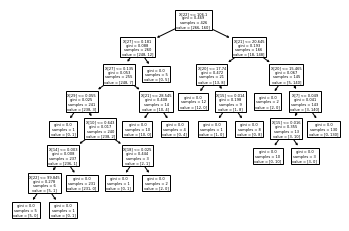

In [0]:
##PLOTTING_DECISION_TREE
 from sklearn import tree
tree.plot_tree(clf)

In [0]:
##KNEIGHBOURS_CLASSIFIER
from sklearn.neighbors import KNeighborsClassifier
clf1=KNeighborsClassifier()
clf1=clf1.fit(x_train,y_train)
y_pred=clf1.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print("accuracy",accuracy)
recall=recall_score(y_test,y_pred)
print("recall",recall)
cm=confusion_matrix(y_test,y_pred)
print("confusion matrix")
print(cm)



accuracy 0.916083916083916
recall 0.8461538461538461
confusion matrix
[[87  4]
 [ 8 44]]


In [0]:
##NAIVE_BAYES_CLASSIFIER
from sklearn.naive_bayes import GaussianNB
clf2=GaussianNB()
clf2.fit(x_train,y_train)
y_pred=clf2.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
print("accuracy",accuracy)
recall=recall_score(y_test,y_pred)
print("recall",recall)
cm=confusion_matrix(y_test,y_pred)
print("confusion matrix")
print(cm)


accuracy 0.965034965034965
recall 0.9230769230769231
confusion matrix
[[90  1]
 [ 4 48]]


In [0]:
##PLOTTING KNN :DECISION BOUNDARIES
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
value=
width=880
plot_decision_regions(x,y.astype(np.integer),clf=clf1,filler_feature_values={0:value,1:value,2:value,3:value},
                      filler_feature_ranges={0:width,1:width,2:width,3:width},
                      x_highlight=None,zoom_factor=(10.0)
                    
plt.xlabel('lump measures')
plt.ylabel('lump measures')
plt.title('KNN with breast dataset')
plt.show()

SyntaxError: ignored